<a id='plotting'></a>
***
<h2><center> Plotting Results </center><h2>

In [14]:
import os
import pandas as pd
#import geopandas as gpd
#import contextily as ctx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.rcParams["figure.figsize"]=20,20

#from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
#from pyincore.analyses.buildingdamage import BuildingDamage
##from pyincore.analyses.cumulativebuildingdamage import CumulativeBuildingDamage
#from pyincore.analyses.populationdislocation import PopulationDislocation, PopulationDislocationUtil
#from pyincore.analyses.housingunitallocation import HousingUnitAllocation
#client = IncoreClient()

###### LOADING THE SOLUTION FILES

In [15]:
qt500 = pd.read_csv("Optimization_Model/seaside_qt_data_500.csv")
qt1000 = pd.read_csv("Optimization_Model/seaside_qt_data_1000.csv")
sc500 = pd.read_csv("Optimization_Model/seaside_sc_data_500.csv")
sc1000 = pd.read_csv("Optimization_Model/seaside_sc_data_1000.csv")

In [16]:
yr500B20 = pd.read_csv("Optimization_Model/500_yr_Results/results_B20_.csv")
yr500B40 = pd.read_csv("Optimization_Model/500_yr_Results/results_B40_.csv")
yr500B60 = pd.read_csv("Optimization_Model/500_yr_Results/results_B60_.csv")
yr1000B20 = pd.read_csv("Optimization_Model/1000_yr_Results/results_B20_.csv")
yr1000B40 = pd.read_csv("Optimization_Model/1000_yr_Results/results_B40_.csv")
yr1000B60 = pd.read_csv("Optimization_Model/1000_yr_Results/results_B60_.csv")

In [17]:
def optimal_points(list_loss,list_dislocation,list_func):
    
    """
    This funciton is  to select the optimal points of objective function  from feasible points
    input: 
    list_loss: list of economic values 
    list_dislocation: list of population dislocation values
    list_func: list of functionality values
    return:
    loss_optimal: list of optimal values of economic loss
    dislocation_optimal:list of optimal values of population dislocatio
    func_optimal:list of optimal values of funcitonality
    
    """ 
    
    l_com = []
    for i in range(0,len(list_loss)):
        l_com.append(tuple([list_loss[i],list_dislocation[i],list_func[i]]))
    # remove the repeated the points
    set_com = set(l_com)
    
    # change the set to list
    list_temp = []
    for x in set_com:
        list_temp.append(x)
    #print("new order:")
    #print(list_temp)
    # if loss and dislocation values  are same as the last loop, find the best value for functionality
    final_f = []
    f_temp = []
    for i in range(len(list_temp)): 
        for j in range(i+1,len(list_temp)):
            if list_temp[i][0] == list_temp[j][0] and list_temp[i][1] ==  list_temp[j][1]:
                if list_temp[i][2] > list_temp[j][2]:
                    f_temp.append(list_temp[i])
                    
                elif list_temp[j][2] > list_temp[i][2]:
                    f_temp.append(list_temp[j])
    final_f = list(set(list_temp) - set(f_temp))
    #print("functionality")
    #print(final_f)
    
    # find the optimal value for dislocation if loss and functionality are same as the last loop
    final_d = []  
    d_temp = []
    for i in range(len(final_f)):
        for j in range(i+1,len(final_f)):
            if final_f[i][0] == final_f[j][0] and final_f[i][2] ==  final_f[j][2]:
                if final_f[i][1] < final_f[j][1]:
                    d_temp.append(final_f[j])
                elif final_f[i][1] > final_f[j][1]:
                    d_temp.append(final_f[i]) 
          
    final_d = list(set(final_f) - set(d_temp))
    #print('dislocation')
    #print(final_d)
    
    # find the optimal value for loss if dislocation and functionality are same as the last loop
    final_l = []
    l_temp = []
    for i in range(len(final_d)):
        for j in range(i+1,len(final_d)):
            if final_d[i][1] == final_d[j][1] and final_d[i][2] ==  final_d[j][2]:
                if final_d[i][0] < final_d[j][0]:
                    l_temp.append(final_d[j])
                elif final_d[i][0] > final_d[j][0]:
                    l_temp.append(final_d[i]) 
    final_l = list(set(final_d) - set(l_temp))
    
    #print('loss')
    #print(final_l)        
    loss_optimal = []
    dislocation_optimal = []
    func_optimal = []
    for x in final_l:
        loss_optimal.append(x[0])
        dislocation_optimal.append(x[1])
        func_optimal.append(x[2])
        
    return loss_optimal,dislocation_optimal,func_optimal

# adding formatting to make plots show $ and millions
def millions(x, pos):
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)


In [18]:
loss_500optimal20 = yr500B20['Economic_loss']
dislocation_500optimal20 = yr500B20['Dislocation']
func_500optimal20 = yr500B20['Functionality']
loss_500optimal40 = yr500B40['Economic_loss']
dislocation_500optimal40 = yr500B40['Dislocation']
func_500optimal40 = yr500B40['Functionality']
loss_500optimal60 = yr500B60['Economic_loss']
dislocation_500optimal60 = yr500B60['Dislocation']
func_500optimal60 = yr500B60['Functionality']

In [19]:
loss_1000optimal20 = yr1000B20['Economic_loss']
dislocation_1000optimal20 = yr1000B20['Dislocation']
func_1000optimal20 = yr1000B20['Functionality']
loss_1000optimal40 = yr1000B40['Economic_loss']
dislocation_1000optimal40 = yr1000B40['Dislocation']
func_1000optimal40 = yr1000B40['Functionality']
loss_1000optimal60 = yr1000B60['Economic_loss']
dislocation_1000optimal60 = yr1000B60['Dislocation']
func_1000optimal60 = yr1000B60['Functionality']

CHOOSING JUST THE OPTIMAL VALUES OF ALL SOLUTIONS

In [20]:
loss_500optimal20, dislocation_500optimal20,func_500optimal20 = optimal_points(loss_500optimal20,dislocation_500optimal20,func_500optimal20)
loss_500optimal40, dislocation_500optimal40,func_500optimal40 = optimal_points(loss_500optimal40,dislocation_500optimal40,func_500optimal40)
loss_500optimal60, dislocation_500optimal60,func_500optimal60 = optimal_points(loss_500optimal60,dislocation_500optimal60,func_500optimal60)

In [21]:
loss_1000optimal20, dislocation_1000optimal20,func_1000optimal20 = optimal_points(loss_1000optimal20,dislocation_1000optimal20,func_1000optimal20)
loss_1000optimal40, dislocation_1000optimal40,func_1000optimal40 = optimal_points(loss_1000optimal40,dislocation_1000optimal40,func_1000optimal40)
loss_1000optimal60, dislocation_1000optimal60,func_1000optimal60 = optimal_points(loss_1000optimal60,dislocation_1000optimal60,func_1000optimal60)

##### 20% Budget Options ($40,000,000)

#### 500 year event

In [22]:
print("Range of Repair Time:",min(func_500optimal20),",",max(func_500optimal20))
print("Range of Population Dislocation:",min(dislocation_500optimal20),",",max(dislocation_500optimal20))
print("Range of Economic loss($Million Dollar):",min(loss_500optimal20),",",max(loss_500optimal20))

Range of Repair Time: 155.4093745 , 167.1632965
Range of Population Dislocation: 2245.456276 , 2425.439102
Range of Economic loss($Million Dollar): 195058235.9 , 210578945.1


#### 1000 year event

In [23]:
print("Range of Repair Time:",min(func_1000optimal20),",",max(func_1000optimal20))
print("Range of Population Dislocation:",min(dislocation_1000optimal20),",",max(dislocation_1000optimal20))
print("Range of Economic loss($Million Dollar):",min(loss_1000optimal20),",",max(loss_1000optimal20))

Range of Repair Time: 362.0900343 , 397.9674945
Range of Population Dislocation: 2618.045183 , 3083.111089
Range of Economic loss($Million Dollar): 354645723.4 , 376626929.2


##### 40% Budget Options ($80,000,000)

#### 500 year event

In [24]:
print("Range of Repair Time:",min(func_500optimal40),",",max(func_500optimal40))
print("Range of Population Dislocation:",min(dislocation_500optimal40),",",max(dislocation_500optimal40))
print("Range of Economic loss($Million Dollar):",min(loss_500optimal40),",",max(loss_500optimal40))

Range of Repair Time: 126.7179788 , 151.9554544
Range of Population Dislocation: 2177.020056 , 2386.676822
Range of Economic loss($Million Dollar): 172991856.4 , 199877618.6


#### 1000 year event

In [25]:
print("Range of Repair Time:",min(func_1000optimal40),",",max(func_1000optimal40))
print("Range of Population Dislocation:",min(dislocation_1000optimal40),",",max(dislocation_1000optimal40))
print("Range of Economic loss($Million Dollar):",min(loss_1000optimal40),",",max(loss_1000optimal40))

Range of Repair Time: 310.2798584 , 352.7619414
Range of Population Dislocation: 2418.750339 , 2947.006042
Range of Economic loss($Million Dollar): 321260047.5 , 351891052.2


##### 60% Budget Options ($120,000,000)

#### 500 year event

In [26]:
print("Range of Repair Time:",min(func_500optimal60),",",max(func_500optimal60))
print("Range of Population Dislocation:",min(dislocation_500optimal60),",",max(dislocation_500optimal60))
print("Range of Economic loss($Million Dollar):",min(loss_500optimal60),",",max(loss_500optimal60))

Range of Repair Time: 113.3884857 , 144.9353652
Range of Population Dislocation: 2154.287778 , 2335.40043
Range of Economic loss($Million Dollar): 157399834.0 , 192044755.6


#### 1000 year event

In [27]:
print("Range of Repair Time:",min(func_1000optimal60),",",max(func_1000optimal60))
print("Range of Population Dislocation:",min(dislocation_1000optimal60),",",max(dislocation_1000optimal60))
print("Range of Economic loss($Million Dollar):",min(loss_1000optimal60),",",max(loss_1000optimal60))

Range of Repair Time: 269.7985654 , 312.5061585
Range of Population Dislocation: 2311.145189 , 2850.855132
Range of Economic loss($Million Dollar): 294555901.6 , 332005862.4


#### 500 Yr Event Community Metrics without any Strategy

In [28]:
yr500_Buildings = qt500.b.sum().tolist()
yr500_Repair_Time = np.sum(qt500.b*qt500.Q_t_hat).tolist()
yr500_Population_Dislocation = np.sum(qt500.b*qt500.d_ijk).tolist()
yr500_Economic_Loss = np.sum(qt500.b*qt500.l).tolist()
Yr500 ={
    ('Buildings'):yr500_Buildings,
    ('Economic Loss'):yr500_Economic_Loss,
    ('Population Dislocation'):yr500_Population_Dislocation,
    ('Repair Time (Days)'):yr500_Repair_Time
}
Yr500 = pd.DataFrame(Yr500.items(),columns = ['Community Metrics','500 Year Event Stats'])
Yr500 = Yr500.round(decimals=0)
Yr500

,Community Metrics,500 Year Event Stats
0,Buildings,4453.0
1,Economic Loss,234244445.0
2,Population Dislocation,2575.0
3,Repair Time (Days),221.0


#### 1000 Yr Event Community Metrics without any Strategy

In [29]:
yr1000_Buildings = qt1000.b.sum().tolist()
yr1000_Repair_Time = np.sum(qt1000.b*qt1000.Q_t_hat).tolist()
yr1000_Population_Dislocation = np.sum(qt1000.b*qt1000.d_ijk).tolist()
yr1000_Economic_Loss = np.sum(qt1000.b*qt1000.l).tolist()
Yr1000 ={
    ('Buildings'):yr1000_Buildings,
    ('Economic Loss'):yr1000_Economic_Loss,
    ('Population Dislocation'):yr1000_Population_Dislocation,
    ('Repair Time (Days)'):yr1000_Repair_Time
}
Yr1000 = pd.DataFrame(Yr1000.items(),columns = ['Community Metrics','1000 Year Event Stats'])
Yr1000 = Yr1000.round(decimals=0)
Yr1000

,Community Metrics,1000 Year Event Stats
0,Buildings,4453.0
1,Economic Loss,405304927.0
2,Population Dislocation,3157.0
3,Repair Time (Days),444.0


### Making Tables for each event

### Providing 3 Plans

##### Selecting Plan 1,Plan 2,Plan 3 by least Economic Loss, Population Dislocation and Repair Time respectively.

In [30]:
Fmin500_B20 = yr500B20[yr500B20.Functionality == yr500B20.Functionality.min()].iloc[0]
Dmin500_B20 = yr500B20[yr500B20.Dislocation == yr500B20.Dislocation.min()].iloc[0]
Emin500_B20 = yr500B20[yr500B20.Economic_loss == yr500B20.Economic_loss.min()].iloc[0]
Fmin500_B40 = yr500B40[yr500B40.Functionality == yr500B40.Functionality.min()].iloc[0]
Dmin500_B40 = yr500B40[yr500B40.Dislocation == yr500B40.Dislocation.min()].iloc[0]
Emin500_B40 = yr500B40[yr500B40.Economic_loss == yr500B40.Economic_loss.min()].iloc[0]
Fmin500_B60 = yr500B60[yr500B60.Functionality == yr500B60.Functionality.min()].iloc[0]
Dmin500_B60 = yr500B60[yr500B60.Dislocation == yr500B60.Dislocation.min()].iloc[0]
Emin500_B60 = yr500B60[yr500B60.Economic_loss == yr500B60.Economic_loss.min()].iloc[0]
Fmin1000_B20 = yr1000B20[yr1000B20.Functionality == yr1000B20.Functionality.min()].iloc[0]
Dmin1000_B20 = yr1000B20[yr1000B20.Dislocation == yr1000B20.Dislocation.min()].iloc[0]
Emin1000_B20 = yr1000B20[yr1000B20.Economic_loss == yr1000B20.Economic_loss.min()].iloc[0]
Fmin1000_B40 = yr1000B40[yr1000B40.Functionality == yr1000B40.Functionality.min()].iloc[0]
Dmin1000_B40 = yr1000B40[yr1000B40.Dislocation == yr1000B40.Dislocation.min()].iloc[0]
Emin1000_B40 = yr1000B40[yr1000B40.Economic_loss == yr1000B40.Economic_loss.min()].iloc[0]
Fmin1000_B60 = yr1000B60[yr1000B60.Functionality == yr1000B60.Functionality.min()].iloc[0]
Dmin1000_B60 = yr1000B60[yr1000B60.Dislocation == yr1000B60.Dislocation.min()].iloc[0]
Emin1000_B60 = yr1000B60[yr1000B60.Economic_loss == yr1000B60.Economic_loss.min()].iloc[0]

In [31]:
print("Solution Selected for Least Repair Time in 500 year event :",Fmin500_B20['S'])
print("Solution Selected for Least Economic Loss in 500 year event :",Emin500_B20['S'])
print("Solution Selected for Least Population Dislocation in 500 year event :",Dmin500_B20['S'])
print("Solution Selected for Least Repair Time in 500 year event :",Fmin500_B40['S'])
print("Solution Selected for Least Economic Loss in 500 year event :",Emin500_B40['S'])
print("Solution Selected for Least Population Dislocation in 500 year event :",Dmin500_B40['S'])
print("Solution Selected for Least Repair Time in 500 year event :",Fmin500_B60['S'])
print("Solution Selected for Least Economic Loss in 500 year event :",Emin500_B60['S'])
print("Solution Selected for Least Population Dislocation in 500 year event :",Dmin500_B60['S'])
print("Solution Selected for Least Repair Time in 1000 year event :",Fmin1000_B20['S'])
print("Solution Selected for Least Economic Loss in 1000 year event :",Emin1000_B20['S'])
print("Solution Selected for Least Population Dislocation in 1000 year event :",Dmin1000_B20['S'])
print("Solution Selected for Least Repair Time in 1000 year event :",Fmin1000_B40['S'])
print("Solution Selected for Least Economic Loss in 1000 year event :",Emin1000_B40['S'])
print("Solution Selected for Least Population Dislocation in 1000 year event :",Dmin1000_B40['S'])
print("Solution Selected for Least Repair Time in 1000 year event :",Fmin1000_B60['S'])
print("Solution Selected for Least Economic Loss in 1000 year event :",Emin1000_B60['S'])
print("Solution Selected for Least Population Dislocation in 1000 year event :",Dmin1000_B60['S'])

Solution Selected for Least Repair Time in 500 year event : 42.0
Solution Selected for Least Economic Loss in 500 year event : 0.0
Solution Selected for Least Population Dislocation in 500 year event : 79.0
Solution Selected for Least Repair Time in 500 year event : 122.0
Solution Selected for Least Economic Loss in 500 year event : 0.0
Solution Selected for Least Population Dislocation in 500 year event : 376.0
Solution Selected for Least Repair Time in 500 year event : 4.0
Solution Selected for Least Economic Loss in 500 year event : 0.0
Solution Selected for Least Population Dislocation in 500 year event : 19.0
Solution Selected for Least Repair Time in 1000 year event : 18.0
Solution Selected for Least Economic Loss in 1000 year event : 0.0
Solution Selected for Least Population Dislocation in 1000 year event : 199.0
Solution Selected for Least Repair Time in 1000 year event : 197.0
Solution Selected for Least Economic Loss in 1000 year event : 1.0
Solution Selected for Least Popul

### CHOOSING THE SOLUTIONS FILES FOR EACH OPTION AT DIFFERENT BUDGET AND DIFFERENT EVENT

In [32]:
Op1_500B20 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B20_X0.csv")
Op2_500B20 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B20_X79.csv")
Op3_500B20 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B20_X42.csv")
Op1_1000B20 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B20_X0.csv")
Op2_1000B20 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B20_X199.csv")
Op3_1000B20 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B20_X18.csv")
Op1_500B40 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B40_X0.csv")
Op2_500B40 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B40_X376.csv")
Op3_500B40 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B40_X122.csv")
Op1_1000B40 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B40_X0.csv")
Op2_1000B40 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B40_X119.csv")
Op3_1000B40 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B40_X196.csv")
Op1_500B60 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B60_X0.csv")
Op2_500B60 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B60_X235.csv")
Op3_500B60 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B60_X44.csv")
Op1_1000B60 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B60_X0.csv")
Op2_1000B60 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B60_X259.csv")
Op3_1000B60 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B60_X205.csv")

##### BUDGET LEVEL 1  $40,000,000

In [33]:
### PLAN 1


subset0_Op1_500B20 = Op1_500B20[Op1_500B20["K"] == 0]
subset1_Op1_500B20 = Op1_500B20[Op1_500B20["K"] == 1]
subset2_Op1_500B20 = Op1_500B20[Op1_500B20["K"] == 2]
subset3_Op1_500B20 = Op1_500B20[Op1_500B20["K"] == 3]
P1NumB050020 = round(subset0_Op1_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 500 yr event
P1NumB150020 = round(subset1_Op1_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 500 yr event
P1NumB250020 = round(subset2_Op1_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 500 yr event
P1NumB350020 = round(subset3_Op1_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 500 yr event
subset0_Op1_1000B20 = Op1_1000B20[Op1_1000B20["K"] == 0]
subset1_Op1_1000B20 = Op1_1000B20[Op1_1000B20["K"] == 1]
subset2_Op1_1000B20 = Op1_1000B20[Op1_1000B20["K"] == 2]
subset3_Op1_1000B20 = Op1_1000B20[Op1_1000B20["K"] == 3]
P1NumB0100020 = round(subset0_Op1_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 1000 yr event
P1NumB1100020 = round(subset1_Op1_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 1000 yr event
P1NumB2100020 = round(subset2_Op1_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 1000 yr event
P1NumB3100020 = round(subset3_Op1_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 1000 yr event


### PLAN 2 
subset0_Op2_500B20 = Op2_500B20[Op2_500B20["K"] == 0]
subset1_Op2_500B20 = Op2_500B20[Op2_500B20["K"] == 1]
subset2_Op2_500B20 = Op2_500B20[Op2_500B20["K"] == 2]
subset3_Op2_500B20 = Op2_500B20[Op2_500B20["K"] == 3]
P2NumB050020 = round(subset0_Op2_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 500 yr event
P2NumB150020 = round(subset1_Op2_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 500 yr event
P2NumB250020 = round(subset2_Op2_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 500 yr event
P2NumB350020 = round(subset3_Op2_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 500 yr event
subset0_Op2_1000B20 = Op2_1000B20[Op2_1000B20["K"] == 0]
subset1_Op2_1000B20 = Op2_1000B20[Op2_1000B20["K"] == 1]
subset2_Op2_1000B20 = Op2_1000B20[Op2_1000B20["K"] == 2]
subset3_Op2_1000B20 = Op2_1000B20[Op2_1000B20["K"] == 3]
P2NumB0100020 = round(subset0_Op2_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 1000 yr event
P2NumB1100020 = round(subset1_Op2_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 1000 yr event
P2NumB2100020 = round(subset2_Op2_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 1000 yr event
P2NumB3100020 = round(subset3_Op2_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 1000 yr event


### PLAN 3

subset0_Op3_500B20 = Op3_500B20[Op3_500B20["K"] == 0]
subset1_Op3_500B20 = Op3_500B20[Op3_500B20["K"] == 1]
subset2_Op3_500B20 = Op3_500B20[Op3_500B20["K"] == 2]
subset3_Op3_500B20 = Op3_500B20[Op3_500B20["K"] == 3]
P3NumB050020 = round(subset0_Op3_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 500 yr event
P3NumB150020 = round(subset1_Op3_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 500 yr event
P3NumB250020 = round(subset2_Op3_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 500 yr event
P3NumB350020 = round(subset3_Op3_500B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 500 yr event
subset0_Op3_1000B20 = Op3_1000B20[Op3_1000B20["K"] == 0]
subset1_Op3_1000B20 = Op3_1000B20[Op3_1000B20["K"] == 1]
subset2_Op3_1000B20 = Op3_1000B20[Op3_1000B20["K"] == 2]
subset3_Op3_1000B20 = Op3_1000B20[Op3_1000B20["K"] == 3]
P3NumB0100020 = round(subset0_Op3_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 1000 yr event
P3NumB1100020 = round(subset1_Op3_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 1000 yr event
P3NumB2100020 = round(subset2_Op3_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 1000 yr event
P3NumB3100020 = round(subset3_Op3_1000B20.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 1000 yr event

In [34]:
Budget1 = {
    ("500 Year Event Plan 1"):(Emin500_B20['Economic_loss'],Emin500_B20['Dislocation'],Emin500_B20['Functionality'],P1NumB050020,P1NumB150020,P1NumB250020,P1NumB350020),
    ("500 Year Event Plan 2"):(Dmin500_B20['Economic_loss'],Dmin500_B20['Dislocation'],Dmin500_B20['Functionality'],P2NumB050020,P2NumB150020,P2NumB250020,P2NumB350020),
    ("500 Year Event Plan 3"):(Fmin500_B20['Economic_loss'],Fmin500_B20['Dislocation'],Fmin500_B20['Functionality'],P3NumB050020,P3NumB150020,P3NumB250020,P3NumB350020),
    
    ("1000 Year Event Plan 1"):(Emin1000_B20['Economic_loss'],Emin1000_B20['Dislocation'],Emin1000_B20['Functionality'],P1NumB0100020,P1NumB1100020,P1NumB2100020,P1NumB3100020),
    ("1000 Year Event Plan 2"):(Dmin1000_B20['Economic_loss'],Dmin1000_B20['Dislocation'],Dmin1000_B20['Functionality'],P2NumB0100020,P2NumB1100020,P2NumB2100020,P2NumB3100020),
    ("1000 Year Event Plan 3"):(Fmin1000_B20['Economic_loss'],Fmin1000_B20['Dislocation'],Fmin1000_B20['Functionality'],P3NumB0100020,P3NumB1100020,P3NumB2100020,P3NumB3100020),
}

In [35]:
Budget1_df = pd.DataFrame(list(Budget1.items()),columns = ['Budget $40,000,000','column2']) 
new_col_list = ['Economic_Loss','Population_Dislocation','Repair_Time (Days)','Number of Buildings not Retrofitted','Number of Buildings Retrofitted to Option 1','Number of Buildings Retrofitted to Option 2','Number of Buildings Retrofitted to Option 3']
for n,col in enumerate(new_col_list):
    Budget1_df[col] = Budget1_df['column2'].apply(lambda column2: column2[n])

Budget1_df = Budget1_df.drop('column2',axis=1)
Budget1_df = Budget1_df.round(decimals=0)
Budget1_df.to_csv("Budget1_OptionsTable.csv")
Budget1_df

,"Budget $40,000,000",Economic_Loss,Population_Dislocation,Repair_Time (Days),Number of Buildings not Retrofitted,Number of Buildings Retrofitted to Option 1,Number of Buildings Retrofitted to Option 2,Number of Buildings Retrofitted to Option 3
0,500 Year Event Plan 1,195058236.0,2425.0,162.0,3425.0,1028.0,0.0,0.0
1,500 Year Event Plan 2,210578945.0,2245.0,167.0,3005.0,1366.0,3.0,79.0
2,500 Year Event Plan 3,196691995.0,2338.0,155.0,3133.0,1309.0,5.0,6.0
3,1000 Year Event Plan 1,354645723.0,3083.0,398.0,3840.0,613.0,0.0,0.0
4,1000 Year Event Plan 2,376626929.0,2618.0,363.0,3433.0,684.0,169.0,167.0
5,1000 Year Event Plan 3,375470024.0,2623.0,362.0,3420.0,706.0,187.0,140.0


In [36]:
Yr500

,Community Metrics,500 Year Event Stats
0,Buildings,4453.0
1,Economic Loss,234244445.0
2,Population Dislocation,2575.0
3,Repair Time (Days),221.0


###### BUDGET LEVEL 2 $80,000,000

In [37]:
### PLAN 1

subset0_Op1_500B40 = Op1_500B40[Op1_500B40["K"] == 0]
subset1_Op1_500B40 = Op1_500B40[Op1_500B40["K"] == 1]
subset2_Op1_500B40 = Op1_500B40[Op1_500B40["K"] == 2]
subset3_Op1_500B40 = Op1_500B40[Op1_500B40["K"] == 3]
P1NumB050040 = round(subset0_Op1_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 500 yr event
P1NumB150040 = round(subset1_Op1_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 500 yr event
P1NumB250040 = round(subset2_Op1_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 500 yr event
P1NumB350040 = round(subset3_Op1_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 500 yr event
subset0_Op1_1000B40 = Op1_1000B40[Op1_1000B40["K"] == 0]
subset1_Op1_1000B40 = Op1_1000B40[Op1_1000B40["K"] == 1]
subset2_Op1_1000B40 = Op1_1000B40[Op1_1000B40["K"] == 2]
subset3_Op1_1000B40 = Op1_1000B40[Op1_1000B40["K"] == 3]
P1NumB0100040 = round(subset0_Op1_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 1000 yr event
P1NumB1100040 = round(subset1_Op1_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 1000 yr event
P1NumB2100040 = round(subset2_Op1_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 1000 yr event
P1NumB3100040 = round(subset3_Op1_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 1000 yr event

### PLAN 2

subset0_Op2_500B40 = Op2_500B40[Op2_500B40["K"] == 0]
subset1_Op2_500B40 = Op2_500B40[Op2_500B40["K"] == 1]
subset2_Op2_500B40 = Op2_500B40[Op2_500B40["K"] == 2]
subset3_Op2_500B40 = Op2_500B40[Op2_500B40["K"] == 3]
P2NumB050040 = round(subset0_Op2_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 500 yr event
P2NumB150040 = round(subset1_Op2_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 500 yr event
P2NumB250040 = round(subset2_Op2_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 500 yr event
P2NumB350040 = round(subset3_Op2_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 500 yr event
subset0_Op2_1000B40 = Op2_1000B40[Op2_1000B40["K"] == 0]
subset1_Op2_1000B40 = Op2_1000B40[Op2_1000B40["K"] == 1]
subset2_Op2_1000B40 = Op2_1000B40[Op2_1000B40["K"] == 2]
subset3_Op2_1000B40 = Op2_1000B40[Op2_1000B40["K"] == 3]
P2NumB0100040 = round(subset0_Op2_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 1000 yr event
P2NumB1100040 = round(subset1_Op2_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 1000 yr event
P2NumB2100040 = round(subset2_Op2_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 1000 yr event
P2NumB3100040 = round(subset3_Op2_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 1000 yr event


#### PLAN 3

subset0_Op3_500B40 = Op3_500B40[Op3_500B40["K"] == 0]
subset1_Op3_500B40 = Op3_500B40[Op3_500B40["K"] == 1]
subset2_Op3_500B40 = Op3_500B40[Op3_500B40["K"] == 2]
subset3_Op3_500B40 = Op3_500B40[Op3_500B40["K"] == 3]
P3NumB050040 = round(subset0_Op3_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 500 yr event
P3NumB150040 = round(subset1_Op3_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 500 yr event
P3NumB250040 = round(subset2_Op3_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 500 yr event
P3NumB350040 = round(subset3_Op3_500B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 500 yr event
subset0_Op3_1000B40 = Op3_1000B40[Op3_1000B40["K"] == 0]
subset1_Op3_1000B40 = Op3_1000B40[Op3_1000B40["K"] == 1]
subset2_Op3_1000B40 = Op3_1000B40[Op3_1000B40["K"] == 2]
subset3_Op3_1000B40 = Op3_1000B40[Op3_1000B40["K"] == 3]
P3NumB0100040 = round(subset0_Op3_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 1000 yr event
P3NumB1100040 = round(subset1_Op3_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 1000 yr event
P3NumB2100040 = round(subset2_Op3_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 1000 yr event
P3NumB3100040 = round(subset3_Op3_1000B40.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 1000 yr event

In [38]:
Budget2 = {
    ("500 Year Event Plan 1"):(Emin500_B40['Economic_loss'],Emin500_B40['Dislocation'],Emin500_B40['Functionality'],P1NumB050040,P1NumB150040,P1NumB250040,P1NumB350040),
    ("500 Year Event Plan 2"):(Dmin500_B40['Economic_loss'],Dmin500_B40['Dislocation'],Dmin500_B40['Functionality'],P2NumB050040,P2NumB150040,P2NumB250040,P2NumB350040),
    ("500 Year Event Plan 3"):(Fmin500_B40['Economic_loss'],Fmin500_B40['Dislocation'],Fmin500_B40['Functionality'],P3NumB050040,P3NumB150040,P3NumB250040,P3NumB350040),
    
    ("1000 Year Event Plan 1"):(Emin1000_B40['Economic_loss'],Emin1000_B40['Dislocation'],Emin1000_B40['Functionality'],P1NumB0100040,P1NumB1100040,P1NumB2100040,P1NumB3100040),
    ("1000 Year Event Plan 2"):(Dmin1000_B40['Economic_loss'],Dmin1000_B40['Dislocation'],Dmin1000_B40['Functionality'],P2NumB0100040,P2NumB1100040,P2NumB2100040,P2NumB3100040),
    ("1000 Year Event Plan 3"):(Fmin1000_B40['Economic_loss'],Fmin1000_B40['Dislocation'],Fmin1000_B40['Functionality'],P3NumB0100040,P3NumB1100040,P3NumB2100040,P3NumB3100040),
}

In [39]:
Budget2_df = pd.DataFrame(list(Budget2.items()),columns = ['Budget $80,000,000','column2']) 
new_col_list = ['Economic_Loss','Population_Dislocation','Repair_Time (Days)','Number of Buildings not Retrofitted','Number of Buildings Retrofitted to Option 1','Number of Buildings Retrofitted to Option 2','Number of Buildings Retrofitted to Option 3']
for n,col in enumerate(new_col_list):
    Budget2_df[col] = Budget2_df['column2'].apply(lambda column2: column2[n])

Budget2_df = Budget2_df.drop('column2',axis=1)
Budget2_df = Budget2_df.round(decimals=0)
Budget2_df.to_csv("Budget2_OptionsTable.csv")
Budget2_df

,"Budget $80,000,000",Economic_Loss,Population_Dislocation,Repair_Time (Days),Number of Buildings not Retrofitted,Number of Buildings Retrofitted to Option 1,Number of Buildings Retrofitted to Option 2,Number of Buildings Retrofitted to Option 3
0,500 Year Event Plan 1,172991856.0,2380.0,142.0,2899.0,1528.0,26.0,0.0
1,500 Year Event Plan 2,199877619.0,2177.0,152.0,2482.0,1705.0,2.0,264.0
2,500 Year Event Plan 3,175821937.0,2246.0,127.0,2208.0,2171.0,23.0,51.0
3,1000 Year Event Plan 1,321260048.0,2947.0,353.0,3079.0,1317.0,57.0,0.0
4,1000 Year Event Plan 2,351891052.0,2419.0,312.0,2914.0,922.0,237.0,380.0
5,1000 Year Event Plan 3,347054578.0,2435.0,310.0,2902.0,955.0,269.0,327.0


##### BUDGET LEVEL 3 ($120,000,000)

In [40]:
### PLAN 1

subset0_Op1_500B60 = Op1_500B60[Op1_500B60["K"] == 0]
subset1_Op1_500B60 = Op1_500B60[Op1_500B60["K"] == 1]
subset2_Op1_500B60 = Op1_500B60[Op1_500B60["K"] == 2]
subset3_Op1_500B60 = Op1_500B60[Op1_500B60["K"] == 3]
P1NumB050060 = round(subset0_Op1_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 500 yr event
P1NumB150060 = round(subset1_Op1_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 500 yr event
P1NumB250060 = round(subset2_Op1_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 500 yr event
P1NumB350060 = round(subset3_Op1_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 500 yr event
subset0_Op1_1000B60 = Op1_1000B60[Op1_1000B60["K"] == 0]
subset1_Op1_1000B60 = Op1_1000B60[Op1_1000B60["K"] == 1]
subset2_Op1_1000B60 = Op1_1000B60[Op1_1000B60["K"] == 2]
subset3_Op1_1000B60 = Op1_1000B60[Op1_1000B60["K"] == 3]
P1NumB0100060 = round(subset0_Op1_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 1000 yr event
P1NumB1100060 = round(subset1_Op1_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 1000 yr event
P1NumB2100060 = round(subset2_Op1_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 1000 yr event
P1NumB3100060 = round(subset3_Op1_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 1000 yr event

### PLAN 2

subset0_Op2_500B60 = Op2_500B60[Op2_500B60["K"] == 0]
subset1_Op2_500B60 = Op2_500B60[Op2_500B60["K"] == 1]
subset2_Op2_500B60 = Op2_500B60[Op2_500B60["K"] == 2]
subset3_Op2_500B60 = Op2_500B60[Op2_500B60["K"] == 3]
P2NumB050060 = round(subset0_Op2_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 500 yr event
P2NumB150060 = round(subset1_Op2_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 500 yr event
P2NumB250060 = round(subset2_Op2_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 500 yr event
P2NumB350060 = round(subset3_Op2_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 500 yr event
subset0_Op2_1000B60 = Op2_1000B60[Op2_1000B60["K"] == 0]
subset1_Op2_1000B60 = Op2_1000B60[Op2_1000B60["K"] == 1]
subset2_Op2_1000B60 = Op2_1000B60[Op2_1000B60["K"] == 2]
subset3_Op2_1000B60 = Op2_1000B60[Op2_1000B60["K"] == 3]
P2NumB0100060 = round(subset0_Op2_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 1000 yr event
P2NumB1100060 = round(subset1_Op2_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 1000 yr event
P2NumB2100060 = round(subset2_Op2_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 1000 yr event
P2NumB3100060 = round(subset3_Op2_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 1000 yr event

### PLAN 3

subset0_Op3_500B60 = Op3_500B60[Op3_500B60["K"] == 0]
subset1_Op3_500B60 = Op3_500B60[Op3_500B60["K"] == 1]
subset2_Op3_500B60 = Op3_500B60[Op3_500B60["K"] == 2]
subset3_Op3_500B60 = Op3_500B60[Op3_500B60["K"] == 3]
P3NumB050060 = round(subset0_Op3_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 500 yr event
P3NumB150060 = round(subset1_Op3_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 500 yr event
P3NumB250060 = round(subset2_Op3_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 500 yr event
P3NumB350060 = round(subset3_Op3_500B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 500 yr event
subset0_Op3_1000B60 = Op3_1000B60[Op3_1000B60["K"] == 0]
subset1_Op3_1000B60 = Op3_1000B60[Op3_1000B60["K"] == 1]
subset2_Op3_1000B60 = Op3_1000B60[Op3_1000B60["K"] == 2]
subset3_Op3_1000B60 = Op3_1000B60[Op3_1000B60["K"] == 3]
P3NumB0100060 = round(subset0_Op3_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 0 for 1000 yr event
P3NumB1100060 = round(subset1_Op3_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 1 for 1000 yr event
P3NumB2100060 = round(subset2_Op3_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 2 for 1000 yr event
P3NumB3100060 = round(subset3_Op3_1000B60.Values.sum(), 0) #Number of Buildings in Retrofit Op 3 for 1000 yr event

In [41]:
Budget3 = {
    ("500 Year Event Plan 1"):(Emin500_B60['Economic_loss'],Emin500_B60['Dislocation'],Emin500_B60['Functionality'],P1NumB050060,P1NumB150060,P1NumB250060,P1NumB350060),
    ("500 Year Event Plan 2"):(Dmin500_B60['Economic_loss'],Dmin500_B60['Dislocation'],Dmin500_B60['Functionality'],P2NumB050060,P2NumB150060,P2NumB250060,P2NumB350060),
    ("500 Year Event Plan 3"):(Fmin500_B60['Economic_loss'],Fmin500_B60['Dislocation'],Fmin500_B60['Functionality'],P3NumB050060,P3NumB150060,P3NumB250060,P3NumB350060),
    
    ("1000 Year Event Plan 1"):(Emin1000_B60['Economic_loss'],Emin1000_B60['Dislocation'],Emin1000_B60['Functionality'],P1NumB0100060,P1NumB1100060,P1NumB2100060,P1NumB3100060),
    ("1000 Year Event Plan 2"):(Dmin1000_B60['Economic_loss'],Dmin1000_B60['Dislocation'],Dmin1000_B60['Functionality'],P2NumB0100060,P2NumB1100060,P2NumB2100060,P2NumB3100060),
    ("1000 Year Event Plan 3"):(Fmin1000_B60['Economic_loss'],Fmin1000_B60['Dislocation'],Fmin1000_B60['Functionality'],P3NumB0100060,P3NumB1100060,P3NumB2100060,P3NumB3100060),
}

In [42]:
Budget3_df = pd.DataFrame(list(Budget3.items()),columns = ['Budget $120,000,000','column2']) 
new_col_list = ['Economic_Loss','Population_Dislocation','Repair_Time (Days)','Number of Buildings not Retrofitted','Number of Buildings Retrofitted to Option 1','Number of Buildings Retrofitted to Option 2','Number of Buildings Retrofitted to Option 3']
for n,col in enumerate(new_col_list):
    Budget3_df[col] = Budget3_df['column2'].apply(lambda column2: column2[n])

Budget3_df = Budget3_df.drop('column2',axis=1)
Budget3_df = Budget3_df.round(decimals=0)
Budget3_df.to_csv("Budget3_OptionsTable.csv")
Budget3_df

,"Budget $120,000,000",Economic_Loss,Population_Dislocation,Repair_Time (Days),Number of Buildings not Retrofitted,Number of Buildings Retrofitted to Option 1,Number of Buildings Retrofitted to Option 2,Number of Buildings Retrofitted to Option 3
0,500 Year Event Plan 1,157399834.0,2261.0,116.0,1823.0,2565.0,10.0,55.0
1,500 Year Event Plan 2,192044756.0,2154.0,145.0,2239.0,1746.0,4.0,465.0
2,500 Year Event Plan 3,164693502.0,2181.0,113.0,1759.0,2453.0,20.0,221.0
3,1000 Year Event Plan 1,294555902.0,2851.0,313.0,2808.0,1290.0,355.0,0.0
4,1000 Year Event Plan 2,332005862.0,2311.0,279.0,2581.0,1042.0,136.0,694.0
5,1000 Year Event Plan 3,304411154.0,2399.0,270.0,2412.0,1363.0,344.0,334.0


In [43]:
Yr1000

,Community Metrics,1000 Year Event Stats
0,Buildings,4453.0
1,Economic Loss,405304927.0
2,Population Dislocation,3157.0
3,Repair Time (Days),444.0


### COMPARING DIFFERENT BUDGET for Individual Event

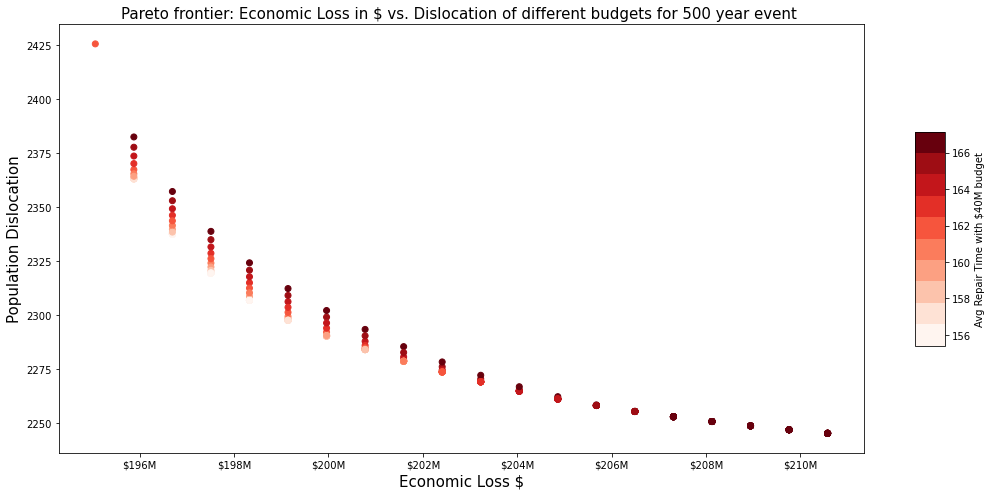

In [61]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,7))

sc1 = ax.scatter(loss_500optimal60,dislocation_500optimal60,c=func_500optimal60,cmap =plt.cm.get_cmap('Blues', 10))
fig.colorbar(sc1,shrink=0.5, aspect=7,label = 'Avg Repair Time with $120M budget')


sc2 = ax.scatter(loss_500optimal40,dislocation_500optimal40,c=func_500optimal40,cmap =plt.cm.get_cmap('Greens', 10))
fig.colorbar(sc2,shrink=0.5, aspect=7,label = "Avg Repair Time with $80M budget")


sc3 = ax.scatter(loss_500optimal20,dislocation_500optimal20,c=func_500optimal20,cmap =plt.cm.get_cmap('Reds', 10))
fig.colorbar(sc3,shrink=0.5, aspect=7,label = "Avg Repair Time with $40M budget")

 
ax.set_xlabel("Economic Loss $",fontsize = 15)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel("Population Dislocation",fontsize = 15)
ax.set_title("Pareto frontier: Economic Loss in $ vs. Dislocation of different budgets for 500 year event ",fontsize = 15)
fig.tight_layout()



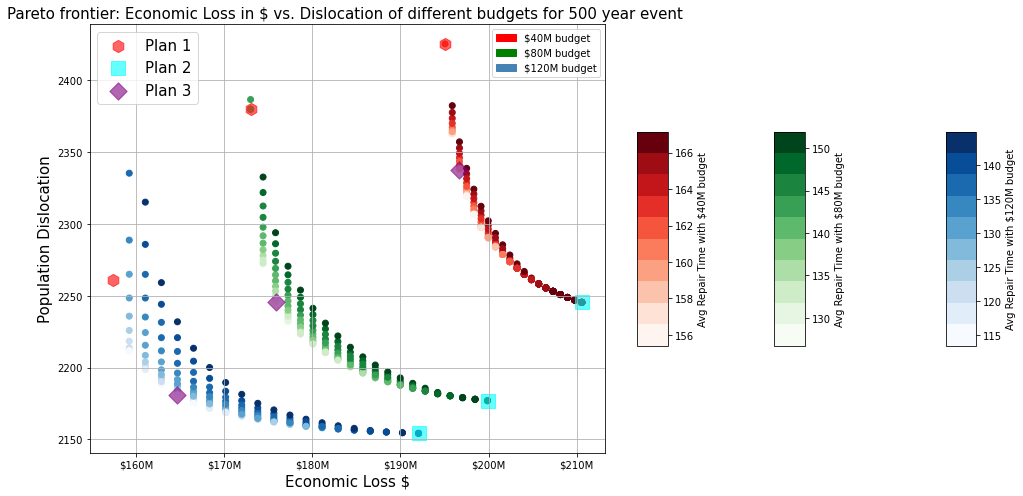

In [55]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,7))
sc1 = ax.scatter(loss_500optimal60,dislocation_500optimal60,c=func_500optimal60,cmap =plt.cm.get_cmap('Blues', 10))
fig.colorbar(sc1,shrink=0.5, aspect=7,label = 'Avg Repair Time with $120M budget')
#legend1 = ax.legend(*sc1.legend_elements(),loc="upper right")
#ax.add_artist(legend1) 

sc2 = ax.scatter(loss_500optimal40,dislocation_500optimal40,c=func_500optimal40,cmap =plt.cm.get_cmap('Greens', 10))
fig.colorbar(sc2,shrink=0.5, aspect=7,label = "Avg Repair Time with $80M budget")
#legend2 = ax.legend(*sc2.legend_elements(),loc="lower right")
#ax.add_artist(legend2)

sc3 = ax.scatter(loss_500optimal20,dislocation_500optimal20,c=func_500optimal20,cmap =plt.cm.get_cmap('Reds', 10))
#v3 = np.linspace(min(loss_optimal20), max(loss_optimal20), 10, endpoint=True)
fig.colorbar(sc3,shrink=0.5, aspect=7,label = "Avg Repair Time with $40M budget")
#legend3 = ax.legend(*sc3.legend_elements(),loc="lower left")
#ax.add_artist(legend3)
 
ax.set_xlabel("Economic Loss $",fontsize = 15)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel("Population Dislocation",fontsize = 15)
ax.set_title("Pareto frontier: Economic Loss in $ vs. Dislocation of different budgets for 500 year event ",fontsize = 15)
fig.tight_layout()

plt.grid()
Budget_20 = mpatches.Patch(color='red', label='$40M budget')
Budget_40 = mpatches.Patch(color='green', label='$80M budget')
Budget_60 = mpatches.Patch(color='steelblue', label='$120M budget')

p1 = plt.scatter(Emin500_B20['Economic_loss'],Emin500_B20['Dislocation'],color = 'red',s = 150,marker ='h',alpha=0.6)
p2 = plt.scatter(Dmin500_B20['Economic_loss'],Dmin500_B20['Dislocation'],color = 'cyan',s = 200,marker ='s',alpha=0.6)
p3 = plt.scatter(Fmin500_B20['Economic_loss'],Fmin500_B20['Dislocation'],color = 'purple',s = 150,marker ='D',alpha=0.6)
p1 = plt.scatter(Emin500_B40['Economic_loss'],Emin500_B40['Dislocation'],color = 'red',s = 150,marker ='h',alpha=0.6)
p2 = plt.scatter(Dmin500_B40['Economic_loss'],Dmin500_B40['Dislocation'],color = 'cyan',s = 200,marker ='s',alpha=0.6)
p3 = plt.scatter(Fmin500_B40['Economic_loss'],Fmin500_B40['Dislocation'],color = 'purple',s = 150,marker ='D',alpha=0.6)
p1 = plt.scatter(Emin500_B60['Economic_loss'],Emin500_B60['Dislocation'],color = 'red',s = 150,marker ='h',alpha=0.6)
p2 = plt.scatter(Dmin500_B60['Economic_loss'],Dmin500_B60['Dislocation'],color = 'cyan',s = 200,marker ='s',alpha=0.6)
p3 = plt.scatter(Fmin500_B60['Economic_loss'],Fmin500_B60['Dislocation'],color = 'purple',s = 150,marker ='D',alpha=0.6)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = plt.legend((p1,p2,p3),('Plan 1','Plan 2', 'Plan 3'),loc="upper left",fontsize = 15)
ax.add_artist(leg);

plt.legend(handles=[Budget_20,Budget_40,Budget_60])

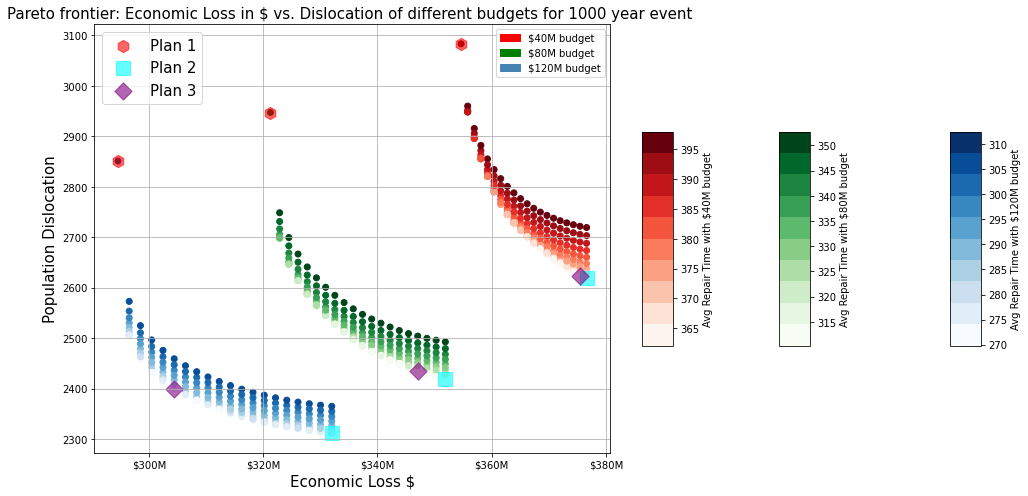

In [51]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,7))
sc1 = ax.scatter(loss_1000optimal60,dislocation_1000optimal60,c=func_1000optimal60,cmap =plt.cm.get_cmap('Blues', 10))
fig.colorbar(sc1,shrink=0.5, aspect=7,label = 'Avg Repair Time with $120M budget')
#legend1 = ax.legend(*sc1.legend_elements(),loc="upper right")
#ax.add_artist(legend1)

sc2 = ax.scatter(loss_1000optimal40,dislocation_1000optimal40,c=func_1000optimal40,cmap =plt.cm.get_cmap('Greens', 10))
fig.colorbar(sc2,shrink=0.5, aspect=7,label = "Avg Repair Time with $80M budget")
#legend2 = ax.legend(*sc2.legend_elements(),loc="lower right")
#ax.add_artist(legend2)

sc3 = ax.scatter(loss_1000optimal20,dislocation_1000optimal20,c=func_1000optimal20,cmap =plt.cm.get_cmap('Reds', 10))
#v3 = np.linspace(min(loss_optimal20), max(loss_optimal20), 10, endpoint=True)
fig.colorbar(sc3,shrink=0.5, aspect=7,label = "Avg Repair Time with $40M budget")
#legend3 = ax.legend(*sc3.legend_elements(),loc="lower left")
#ax.add_artist(legend3)

ax.set_xlabel("Economic Loss $",fontsize = 15)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel("Population Dislocation",fontsize = 15)
ax.set_title("Pareto frontier: Economic Loss in $ vs. Dislocation of different budgets for 1000 year event ",fontsize = 15)
fig.tight_layout()

plt.grid()
Budget_20 = mpatches.Patch(color='red', label='$40M budget')
Budget_40 = mpatches.Patch(color='green', label='$80M budget')
Budget_60 = mpatches.Patch(color='steelblue', label='$120M budget')

#p1 = plt.scatter(Emin1000_B20['Economic_loss'],Emin1000_B20['Dislocation'],color = 'red',s = 150,marker ='h',alpha=0.6)
p2 = plt.scatter(Dmin1000_B20['Economic_loss'],Dmin1000_B20['Dislocation'],color = 'cyan',s = 200,marker ='s',alpha=0.6)
p3 = plt.scatter(Fmin1000_B20['Economic_loss'],Fmin1000_B20['Dislocation'],color = 'purple',s = 150,marker ='D',alpha=0.6)
p1 = plt.scatter(Emin1000_B40['Economic_loss'],Emin1000_B40['Dislocation'],color = 'red',s = 150,marker ='h',alpha=0.6)
p2 = plt.scatter(Dmin1000_B40['Economic_loss'],Dmin1000_B40['Dislocation'],color = 'cyan',s = 200,marker ='s',alpha=0.6)
p3 = plt.scatter(Fmin1000_B40['Economic_loss'],Fmin1000_B40['Dislocation'],color = 'purple',s = 150,marker ='D',alpha=0.6)
p1 = plt.scatter(Emin1000_B60['Economic_loss'],Emin1000_B60['Dislocation'],color = 'red',s = 150,marker ='h',alpha=0.6)
p2 = plt.scatter(Dmin1000_B60['Economic_loss'],Dmin1000_B60['Dislocation'],color = 'cyan',s = 200,marker ='s',alpha=0.6)
p3 = plt.scatter(Fmin1000_B60['Economic_loss'],Fmin1000_B60['Dislocation'],color = 'purple',s = 150,marker ='D',alpha=0.6)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = plt.legend((p1,p2,p3),('Plan 1','Plan 2', 'Plan 3'),loc="upper left",fontsize = 15)
ax.add_artist(leg);
plt.legend(handles=[Budget_20,Budget_40,Budget_60])

# plt.savefig('pareto_1000.png', 
#     transparent=False, 
#     dpi=1000,
#     bbox_inches = 'tight',
#     pad_inches = 0.2)

#### Reading in building polygon dataset and setting up function to filter data

In [46]:
# reading in building polygon dataset
bldg_dataset_id = "5df40388b9219c06cf8b0c80"
#bldg_dataset_id = "5d927ab2b9219c06ae8d313c"
data_service = DataService(client)
dataset = Dataset.from_data_service(bldg_dataset_id, data_service)
rd = dataset.get_inventory_reader()

# setting up geodataframe
gdf = gpd.GeoDataFrame.from_features([feature for feature in rd], crs="EPSG:3857")
gdf = gdf[['guid', 'geometry']]
gdf.dropna(subset=['guid'], inplace=True)
gdf.drop_duplicates(subset='guid', inplace=True)
gdf.set_index('guid', inplace=True)

def get_gdf_feats(gdf, path_to_run=None, values=None, k=None):
    df = pd.read_csv(path_to_run)
    df.set_index('Z', inplace=True)
    if values != None:
        df = df.loc[df['Values'].isin(values)]
    if k != None:
        df = df.loc[df['K'].isin(k)]
    gdf_new = pd.merge(gdf, df, left_index=True, right_index=True)
    return gdf_new

NameError: name 'DataService' is not defined

In [ ]:
Budget1_df

In [ ]:
Budget2_df

In [ ]:
Budget3_df

In [ ]:
Yr1000

In [ ]:
Yr500

### Drawing Map

In [ ]:
##### The range of options to look at:

#  | Option     | Description                                      |
#  | ---        | ---                                              |
#  | Op1_500B20 | Plan 1 for 500 year event with Budget $40,000,000| 
#  | Op2_500B20 | Plan 2 for 500 year event with Budget $40,000,000|
#  | Op3_500B20 | Plan 3 for 500 year event with Budget $40,000,000| 
#  | Op1_500B40 | Plan 1 for 500 year event with Budget $80,000,000|
#  | Op2_500B40 | Plan 2 for 500 year event with Budget $80,000,000|
#  | Op3_500B40 | Plan 3 for 500 year event with Budget $80,000,000|
#  | Op1_500B60 | Plan 1 for 500 year event with Budget $120,000,000|
#  | Op2_500B60 | Plan 2 for 500 year event with Budget $120,000,000|
#  | Op3_500B60 | Plan 3 for 500 year event with Budget $120,000,000|

In [ ]:
# --- making figure and map
fig, ax = plt.subplots(1,1)
gdf = gdf.to_crs(epsg=3857)

# plotting all parcels
gdf.plot(ax=ax, color='yellow')
abc = "Optimization_Model/1000_yr_Results/decision_variable_B60_X205.csv"
# getting a subset of parcels
gdf_k1 = get_gdf_feats(gdf, path_to_run= abc , values=[1,2], k=[1])
gdf_k2 = get_gdf_feats(gdf, path_to_run= abc, values=[1,2], k=[2])
gdf_k3 = get_gdf_feats(gdf, path_to_run= abc, values=[1,2], k=[3])

# drawing the subset of parcels on the map
gdf_k1.plot(ax=ax, color='salmon')
gdf_k2.plot(ax=ax, color='green')
gdf_k3.plot(ax=ax, color='blue')
# adding basemap
#ctx.add_basemap(ax, zoom=15, crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)
ctx.add_basemap(ax, zoom=15, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
p0 = mpatches.Patch(color='yellow')
p1 = mpatches.Patch(color='salmon')
p2 = mpatches.Patch(color='green')
p3 = mpatches.Patch(color='blue')
leg = plt.legend((p0,p1,p2,p3),('Mitigation Option 0','Mitigation Option 1','Mitigation Option 2', 'Mitigation Option 3'),loc="upper left",fontsize = 15)
ax.add_artist(leg);
ax.set_title("Retrofitting Strategy in Plan 3 with Budget $120 Million for 1000year-event",fontsize = 15)